In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Mount Files From Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import glob


# Define paths to your folders in Google Drive - Double-check these paths!
train_path = "/content/drive/My Drive/micro_gas_turbine_data/train/train/*.csv"
test_path = "/content/drive/My Drive/micro_gas_turbine_data/test/test/*.csv"

# Print the list of files found to check if the paths are correct
train_files = glob.glob(train_path)
print("Train files found:", train_files)

test_files = glob.glob(test_path)
print("Test files found:", test_files)

# Load all training CSV files into a single DataFrame
train_data = pd.concat([pd.read_csv(f) for f in train_files], ignore_index=True)

# Load all testing CSV files into a single DataFrame
test_data = pd.concat([pd.read_csv(f) for f in test_files], ignore_index=True)

# Check the data
print("Training Data Shape:", train_data.shape)
print("Testing Data Shape:", test_data.shape)

Train files found: ['/content/drive/My Drive/micro_gas_turbine_data/train/train/ex_20.csv', '/content/drive/My Drive/micro_gas_turbine_data/train/train/ex_21.csv', '/content/drive/My Drive/micro_gas_turbine_data/train/train/ex_23.csv', '/content/drive/My Drive/micro_gas_turbine_data/train/train/ex_1.csv', '/content/drive/My Drive/micro_gas_turbine_data/train/train/ex_24.csv', '/content/drive/My Drive/micro_gas_turbine_data/train/train/ex_9.csv']
Test files found: ['/content/drive/My Drive/micro_gas_turbine_data/test/test/ex_4.csv', '/content/drive/My Drive/micro_gas_turbine_data/test/test/ex_22.csv']
Training Data Shape: (52940, 3)
Testing Data Shape: (18285, 3)


In [4]:
train_data.head(3)

,time,input_voltage,el_power
0,849.22,3.0,1238.511285
1,850.24,3.0,1149.563728
2,851.26,3.0,1226.959165


In [5]:
test_data.head(3)

,time,input_voltage,el_power
0,758.425813,3.0,1206.993434
1,759.425109,3.0,1255.072122
2,760.424406,3.0,1203.093254


# Checking The Null Values

In [6]:
test_data.isnull().sum() , train_data.isnull().sum()

(time             0
 input_voltage    0
 el_power         0
 dtype: int64,
 time             0
 input_voltage    0
 el_power         0
 dtype: int64)

# Visulize The Data

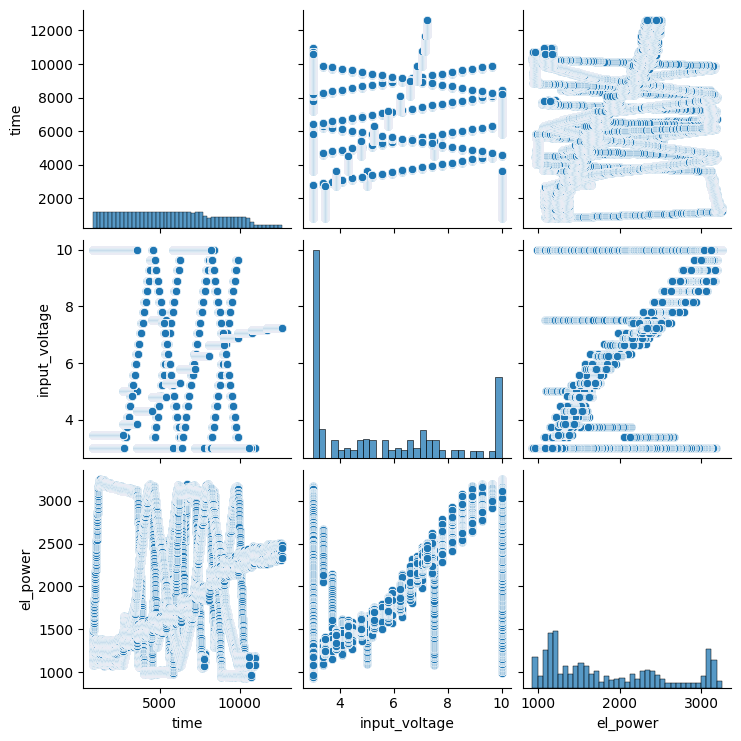

In [7]:
sns.pairplot(train_data)

# Split The Data In Training And Testing

In [8]:
from sklearn.model_selection import train_test_split

# Merge train and test datasets
combined_data = pd.concat([train_data, test_data])

# Separate features and target
X = combined_data.iloc[:, :-1]
y = combined_data.iloc[:, -1]

# Perform train-test split (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
X_train

,time,input_voltage
6138,7448.70000,3.000000
31483,10107.21118,3.000000
32686,1414.92000,3.000000
6658,1012.92000,3.000000
38462,7674.26000,8.157895
...,...,...
37194,6307.06000,3.000000
6265,7584.92000,3.000000
1946,2703.05614,5.000000
860,1736.34000,3.000000


In [10]:
y_train

,el_power
6138,1788.606597
31483,968.140210
32686,1223.923878
6658,1180.388994
38462,2814.238008
...,...
37194,1170.566371
6265,1205.834549
1946,1591.953050
860,1240.239291


In [11]:
train_data.shape , X_train.shape , y_train.shape ,  test_data.shape , X_test.shape , y_test.shape

((52940, 3), (49857, 2), (49857,), (18285, 3), (21368, 2), (21368,))

# Normalize The Data

In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns)

<ipython-input-13-83bffdbd0c59>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train , color='blue') , sns.distplot(X_test , color='red')
<ipython-input-13-83bffdbd0c59>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train , color='blue') , sns.distplot(X_test , color='red')


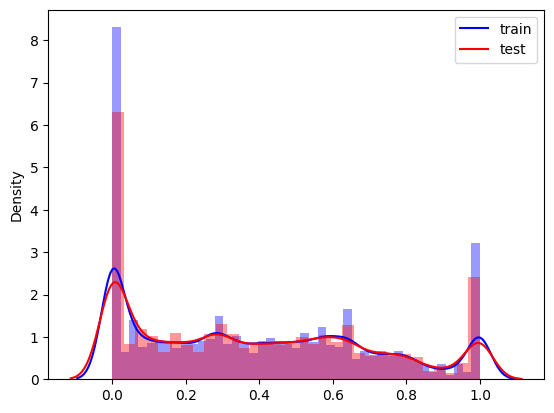

In [13]:
sns.distplot(X_train , color='blue') , sns.distplot(X_test , color='red')
plt.legend(['train' , 'test'])

In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , BatchNormalization , Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import L1 , L2 , L1L2

# Create The Model

 Define The Model

In [15]:
Ann = Sequential()
Ann.add(Dense(150 , input_dim=2 ,activation='relu')),
Ann.add(BatchNormalization())
Ann.add(Dropout(0.1))
Ann.add(Dense(125 , activation='relu')),
Ann.add(BatchNormalization())
Ann.add(Dropout(0.0))
Ann.add(Dense(75 , activation='relu')),
Ann.add(BatchNormalization())
Ann.add(Dropout(0.1))
Ann.add(Dense(55 , activation='relu')),
Ann.add(BatchNormalization())
Ann.add(Dropout(0.1))
Ann.add(Dense(35 , activation='relu')),
Ann.add(Dense(20 , activation='relu')),
Ann.add(BatchNormalization())
Ann.add(Dense(1 ,activation='relu'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
Ann.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 150)                 │             450 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 150)                 │             600 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 150)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 125)                 │          18,875 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 125)                 │             500 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 125)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 75)                  │           9,450 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 75)                  │             300 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 75)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 55)                  │           4,180 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 55)                  │             220 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 55)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 35)                  │           1,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 20)                  │             720 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 20)                  │              80 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │              21 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 37,356 (145.92 KB)

 Trainable params: 36,506 (142.60 KB)

 Non-trainable params: 850 (3.32 KB)

Compile The Model

In [17]:
Ann.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001) ,loss=['mse'] , metrics=['mae'] )

Fit The Model

In [18]:
Ann.fit(X_train , y_train , batch_size = 512 ,epochs=300 , callbacks=EarlyStopping(monitor='val_loss', patience=20 , restore_best_weights=True) , validation_data = (X_test , y_test))

Epoch 1/300
98/98 ━━━━━━━━━━━━━━━━━━━━ 14s 55ms/step - loss: 4052297.0000 - mae: 1870.8396 - val_loss: 4065883.0000 - val_mae: 1872.3003
Epoch 2/300
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4018584.2500 - mae: 1862.4910 - val_loss: 4058213.2500 - val_mae: 1870.9596
Epoch 3/300
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 4027091.2500 - mae: 1866.2467 - val_loss: 4039052.5000 - val_mae: 1867.2214
Epoch 4/300
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4007084.7500 - mae: 1861.2115 - val_loss: 4013277.5000 - val_mae: 1861.7101
Epoch 5/300
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 3977733.7500 - mae: 1855.9340 - val_loss: 3982716.7500 - val_mae: 1855.1365
Epoch 6/300
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 3968420.5000 - mae: 1853.5863 - val_loss: 3957627.0000 - val_mae: 1850.3499
Epoch 7/300
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 3926473.7500 - mae: 1844.5396 - val_loss: 3927938.2500 - val_mae: 1844.0179
Epoch 8/300
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - 

# Evaluate The Model

In [19]:
Ann.evaluate(X_test , y_test)

668/668 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 60950.2148 - mae: 129.4667


[61561.1953125, 129.855712890625]

In [20]:
Ann.evaluate(X_train , y_train)

1559/1559 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 64527.4961 - mae: 133.9179


[64540.046875, 133.06666564941406]

In [21]:
train_prd = Ann.predict(X_train)


1559/1559 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


In [22]:
test_prd = Ann.predict(X_test)


668/668 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [23]:
from sklearn.metrics import r2_score , mean_absolute_error , mean_squared_error

print('R2 :',r2_score(y_train , train_prd) * 100 , r2_score(y_test , test_prd) * 100)
print('MAE :',mean_absolute_error(y_train , train_prd)*100 , mean_absolute_error(y_test , test_prd) *100)
print('MSE :',mean_squared_error(y_train , train_prd) *100, mean_squared_error(y_test , test_prd) *100)

R2 : 88.42303525430736 89.05512844614209
MAE : 13306.665287376898 12985.570852690615
MSE : 6454004.034642061 6156122.673468141
